In [2]:
import numpy as np
import cv2
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D,Dense,Dropout,SpatialDropout2D
from tensorflow.keras.models  import Sequential
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
import random,os,glob
import matplotlib.pyplot as plt

In [3]:
import zipfile

zip_ref = zipfile.ZipFile("dataset-resized.zip", 'r')
zip_ref.extractall("data")
zip_ref.close()

In [4]:
dir_path = 'data/dataset-resized'

In [5]:
img_list = glob.glob(os.path.join(dir_path, '*/*.jp*'))

In [6]:
len(img_list)

5351

In [7]:
train=ImageDataGenerator(horizontal_flip=True,
                         vertical_flip=True,
                         validation_split=0.1,
                         rescale=1./255,
                         shear_range = 0.1,
                         zoom_range = 0.1,
                         width_shift_range = 0.1,
                         height_shift_range = 0.1,)

test=ImageDataGenerator(rescale=1/255,
                        validation_split=0.1)

train_generator=train.flow_from_directory(dir_path,
                                          target_size=(300,300),
                                          batch_size=32,
                                          class_mode='categorical',
                                          subset='training')

test_generator=test.flow_from_directory(dir_path,
                                        target_size=(300,300),
                                        batch_size=32,
                                        class_mode='categorical',
                                        subset='validation')

labels = (train_generator.class_indices)
print(labels)

labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 4820 images belonging to 8 classes.
Found 532 images belonging to 8 classes.
{'cardboard': 0, 'e-waste': 1, 'foil': 2, 'glass': 3, 'metal': 4, 'paper': 5, 'plastic': 6, 'trash': 7}
{0: 'cardboard', 1: 'e-waste', 2: 'foil', 3: 'glass', 4: 'metal', 5: 'paper', 6: 'plastic', 7: 'trash'}


In [8]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((32, 300, 300, 3), (32, 8))

In [9]:
print (train_generator.class_indices)

Labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(Labels)

{'cardboard': 0, 'e-waste': 1, 'foil': 2, 'glass': 3, 'metal': 4, 'paper': 5, 'plastic': 6, 'trash': 7}


In [10]:
model=Sequential()
#Convolution blocks

model.add(Conv2D(32,(3,3), padding='same',input_shape=(300,300,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 
#model.add(SpatialDropout2D(0.5)) # No accuracy

model.add(Conv2D(64,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 
#model.add(SpatialDropout2D(0.5))

model.add(Conv2D(32,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 

#Classification layers
model.add(Flatten())

model.add(Dense(64,activation='relu'))
#model.add(SpatialDropout2D(0.5))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(8,activation='softmax'))

filepath="trained_model.h5"
checkpoint1 = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint1]

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc']) # RMS PROP - No accuracy

In [12]:
history = model.fit_generator(train_generator,
                              epochs=100,
                              steps_per_epoch=4820//32,
                              validation_data=test_generator,
                              validation_steps=532//32,
                              workers = 4,
                              callbacks=callbacks_list) 

Epoch 1/100
149/150 [============================>.] - ETA: 3s - loss: 1.9645 - acc: 0.2151
Epoch 00001: val_acc improved from -inf to 0.21484, saving model to trained_model.h5
150/150 [==============================] - 548s 4s/step - loss: 1.9642 - acc: 0.2153 - val_loss: 1.9193 - val_acc: 0.2148
Epoch 2/100
149/150 [============================>.] - ETA: 3s - loss: 1.8256 - acc: 0.2782
Epoch 00002: val_acc improved from 0.21484 to 0.27148, saving model to trained_model.h5
150/150 [==============================] - 538s 4s/step - loss: 1.8249 - acc: 0.2786 - val_loss: 1.7513 - val_acc: 0.2715
Epoch 3/100
149/150 [============================>.] - ETA: 3s - loss: 1.7227 - acc: 0.3343
Epoch 00003: val_acc improved from 0.27148 to 0.32031, saving model to trained_model.h5
150/150 [==============================] - 534s 4s/step - loss: 1.7225 - acc: 0.3346 - val_loss: 1.7154 - val_acc: 0.3203
Epoch 4/100
149/150 [============================>.] - ETA: 3s - loss: 1.6467 - acc: 0.3629
Epoch

149/150 [============================>.] - ETA: 2s - loss: 1.0980 - acc: 0.5942
Epoch 00030: val_acc did not improve from 0.58398
150/150 [==============================] - 352s 2s/step - loss: 1.0981 - acc: 0.5936 - val_loss: 1.2803 - val_acc: 0.5293
Epoch 31/100
149/150 [============================>.] - ETA: 2s - loss: 1.0702 - acc: 0.6177
Epoch 00031: val_acc did not improve from 0.58398
150/150 [==============================] - 351s 2s/step - loss: 1.0711 - acc: 0.6174 - val_loss: 1.3226 - val_acc: 0.5371
Epoch 32/100
149/150 [============================>.] - ETA: 2s - loss: 1.0874 - acc: 0.6009
Epoch 00032: val_acc improved from 0.58398 to 0.59180, saving model to trained_model.h5
150/150 [==============================] - 350s 2s/step - loss: 1.0877 - acc: 0.6015 - val_loss: 1.2509 - val_acc: 0.5918
Epoch 33/100
149/150 [============================>.] - ETA: 2s - loss: 1.1018 - acc: 0.6072
Epoch 00033: val_acc did not improve from 0.59180
150/150 [============================

149/150 [============================>.] - ETA: 2s - loss: 0.8301 - acc: 0.7073
Epoch 00060: val_acc did not improve from 0.66992
150/150 [==============================] - 353s 2s/step - loss: 0.8288 - acc: 0.7076 - val_loss: 1.1529 - val_acc: 0.5801
Epoch 61/100
149/150 [============================>.] - ETA: 2s - loss: 0.8225 - acc: 0.7087
Epoch 00061: val_acc did not improve from 0.66992
150/150 [==============================] - 363s 2s/step - loss: 0.8232 - acc: 0.7088 - val_loss: 1.1281 - val_acc: 0.6348
Epoch 62/100
149/150 [============================>.] - ETA: 2s - loss: 0.8499 - acc: 0.6962
Epoch 00062: val_acc did not improve from 0.66992
150/150 [==============================] - 352s 2s/step - loss: 0.8511 - acc: 0.6954 - val_loss: 1.0901 - val_acc: 0.6348
Epoch 63/100
149/150 [============================>.] - ETA: 2s - loss: 0.8253 - acc: 0.7020
Epoch 00063: val_acc did not improve from 0.66992
150/150 [==============================] - 356s 2s/step - loss: 0.8261 - ac

Epoch 91/100
149/150 [============================>.] - ETA: 2s - loss: 0.7046 - acc: 0.7504
Epoch 00091: val_acc did not improve from 0.69727
150/150 [==============================] - 411s 3s/step - loss: 0.7024 - acc: 0.7508 - val_loss: 1.0402 - val_acc: 0.6855
Epoch 92/100
149/150 [============================>.] - ETA: 2s - loss: 0.6759 - acc: 0.7641
Epoch 00092: val_acc did not improve from 0.69727
150/150 [==============================] - 423s 3s/step - loss: 0.6771 - acc: 0.7642 - val_loss: 0.9838 - val_acc: 0.6562
Epoch 93/100
149/150 [============================>.] - ETA: 2s - loss: 0.6936 - acc: 0.7534
Epoch 00093: val_acc did not improve from 0.69727
150/150 [==============================] - 418s 3s/step - loss: 0.6944 - acc: 0.7533 - val_loss: 1.0274 - val_acc: 0.6562
Epoch 94/100
149/150 [============================>.] - ETA: 2s - loss: 0.6813 - acc: 0.7593
Epoch 00094: val_acc did not improve from 0.69727
150/150 [==============================] - 422s 3s/step - loss

Maximum Probability:  0.8900518
Classified: e-waste


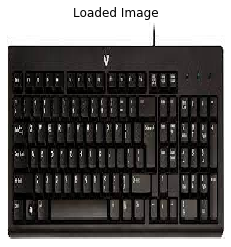

In [13]:
from keras.preprocessing import image

img_path = 'keyboard.jpg'

img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img, dtype=np.uint8)
img=np.array(img)/255.0

plt.title("Loaded Image")
plt.axis('off')
plt.imshow(img.squeeze())

p=model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Maximum Probability: ",np.max(p[0], axis=-1))
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Classified:",predicted_class)


-------------------Individual Probability--------------------------------

CARDBOARD : 0.0 %
E-WASTE : 89.01 %
FOIL : 0.04 %
GLASS : 10.91 %
METAL : 0.0 %
PAPER : 0.0 %
PLASTIC : 0.04 %
TRASH : 0.0 %


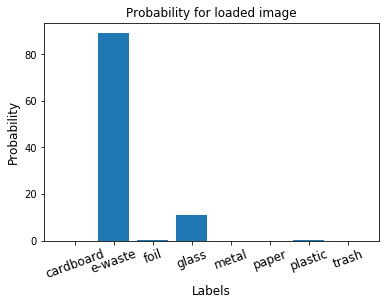

In [14]:
classes=[]
prob=[]
print("\n-------------------Individual Probability--------------------------------\n")

for i,j in enumerate (p[0],0):
    print(labels[i].upper(),':',round(j*100,2),'%')
    classes.append(labels[i])
    prob.append(round(j*100,2))
    
def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(classes))
    plt.bar(index, prob)
    plt.xlabel('Labels', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.xticks(index, classes, fontsize=12, rotation=20)
    plt.title('Probability for loaded image')
    plt.show()
plot_bar_x()

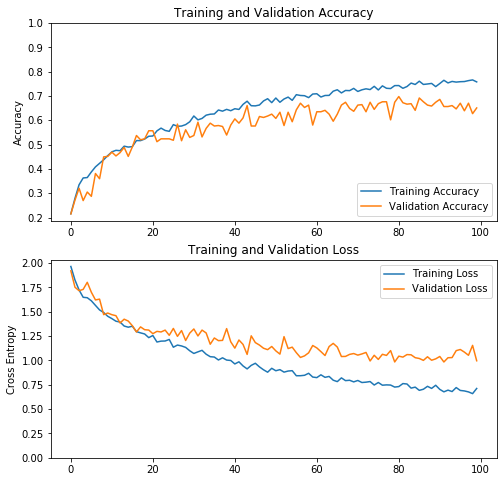

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

# ________________ Graph 1 -------------------------

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

# ________________ Graph 2 -------------------------

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [19]:
import tensorflow as tf

model = tf.keras.models.load_model( 'trained_model.h5' )

converter = tf.compat.v1.lite.TFLiteConverter.from_keras_model_file( 'trained_model.h5' )
tflite_model = converter.convert()
open("mix_garbage.tflite", "wb").write(tflite_model)  

Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 12 variables.
INFO:tensorflow:Converted 12 variables to const ops.


11378788